# PROJECT SUICIDE RATE
### This project is an attempt to see the suicide rate for various countries.  The data has been downloaded from Kaggle and imported using pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
suicide_rate = pd.read_csv('suicide.csv',
                          usecols=[0,1,2,3,4,5])
suicide_rate.head()

,country,year,sex,age,suicides_no,population
0,Albania,1987,male,15-24 years,21,312900
1,Albania,1987,male,35-54 years,16,308000
2,Albania,1987,female,15-24 years,14,289700
3,Albania,1987,male,75+ years,1,21800
4,Albania,1987,male,25-34 years,9,274300


### The data is grouped by country.  The total number of suicides were summed up and the top five countries were sorted in a descending order. The results are visualized in a bar graph to visualize differences.

In [3]:
suicide_by_country = suicide_rate.groupby('country').suicides_no.sum()
top_five_country = suicide_by_country.sort_values(ascending=False)[:5]

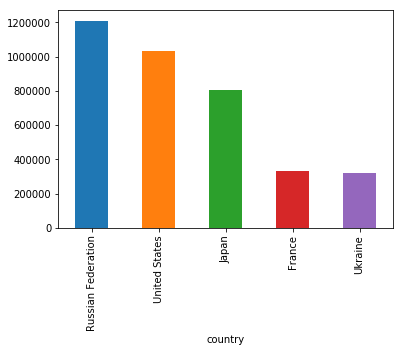

In [4]:
top_five_country.plot(x='country', y='suicides_no',
                    kind = 'bar')

### Knowing which top countries have the highest rate of suicide, a comparison of the top 5 by year can show us the trend.  Using a line graph, all five countries can be graphed together and displayed yearly.

In [5]:
top_five_country

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Name: suicides_no, dtype: int64

Text(0,0.5,'Suicide Count')

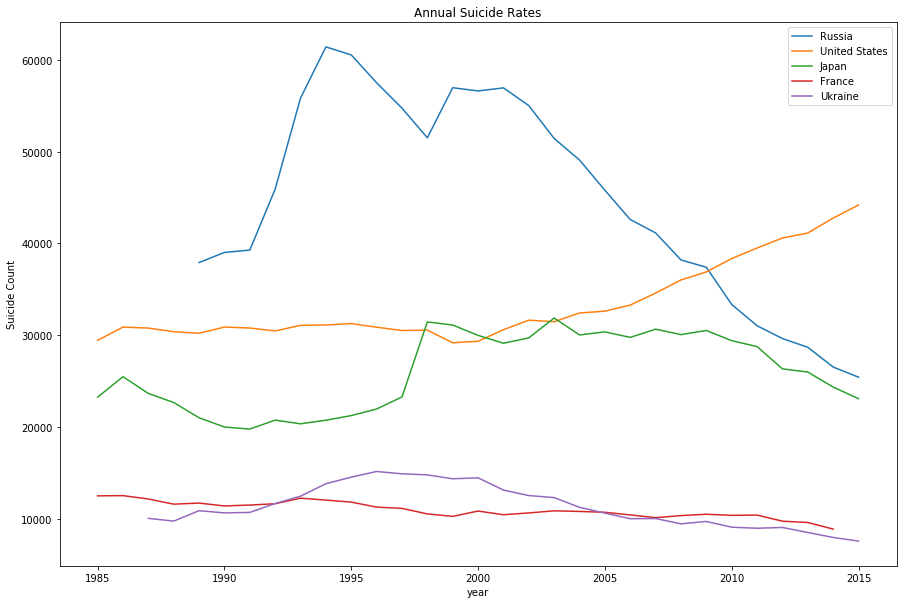

In [6]:
russian_count = suicide_rate[suicide_rate['country']=='Russian Federation'].groupby(['year']).suicides_no.sum()
us_count = suicide_rate[suicide_rate['country']=='United States'].groupby(['year']).suicides_no.sum()
japan_count = suicide_rate[suicide_rate['country']=='Japan'].groupby(['year']).suicides_no.sum()
france_count = suicide_rate[suicide_rate['country']=='France'].groupby(['year']).suicides_no.sum()
ukraine_count = suicide_rate[suicide_rate['country']=='Ukraine'].groupby(['year']).suicides_no.sum()
russian_count.plot(figsize=(15,10), label='Russia')
us_count.plot(figsize=(15,10), label='United States')
japan_count.plot(figsize=(15,10), label='Japan')
france_count.plot(figsize=(15,10), label='France')
ukraine_count.plot(figsize=(15,10), label='Ukraine')
plt.legend(loc='upper right')
plt.title('Annual Suicide Rates')
plt.ylabel('Suicide Count')

### After plotting the suicide count of the top 5 countries with a line graph, several points can be noticed.  The first point is that although Russian Federation has the highest total count of suicides with a sharp increase from 1991 to 1994, their annual count has been declining since 2001.  United States, on the other hand, has been steady from 1985 to 2000 with an average of 30,000 count per year but starts increasing in 2003 and continues to increase.  Finally, although they were in the top 5 in terms of suicide rate, France and Ukraine has a count that is less than 10,000 in 2014.

### According to the imported file, the data has also been separated by age groups.  Knowing this, we can determine which age group has the highest count of suicide rates.

In [7]:
suicide_by_group = suicide_rate.groupby('age').suicides_no.sum()
suicide_by_group = suicide_by_group.sort_values(ascending=False)
suicide_by_group

age
35-54 years    2452141
55-74 years    1658443
25-34 years    1123912
15-24 years     808542
75+ years       653118
5-14 years       52264
Name: suicides_no, dtype: int64

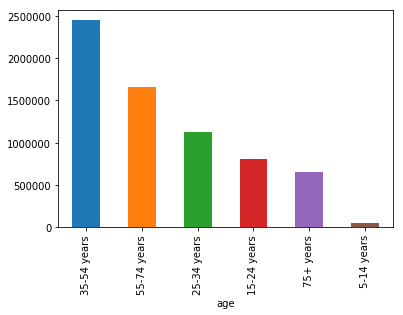

In [8]:
suicide_by_group.plot(x='age', y='suicides_no', kind='bar')

### Results from above indicate that individuals that are between age groups of 35 to 54 years have the highest count of suicide.  Men also have a suicide rate that are more than twice that of female as indicated from the bar graph below.

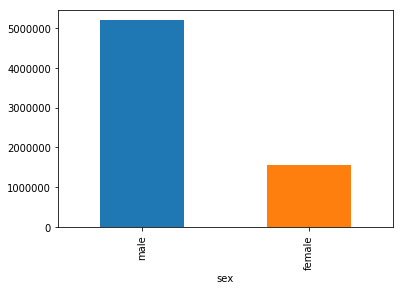

In [9]:
gender_suicide = suicide_rate.groupby('sex').suicides_no.sum().sort_values(ascending=False)
gender_suicide.plot(x='sex', y='suicides_no', kind='bar')